In [1]:
# Import important libs

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

%matplotlib inline

In [2]:
# Read data frame for this lesson

df = pd.read_csv('/home/jupyter-n-korotkov/Karpov.Courses/statistics/conversion.csv')

In [3]:
# Data desription:

    # ad_id – идентификатор объявления (рекламы)
    # xyz_campaign_id – идентификатор рекламной кампании в базе компании X
    # fb_campaign_id – идентификатор кампании в Facebook
    # age – возрастная группа, которой показывалась реклама
    # gender – пол тех, кому показывалась реклама
    # interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
    # impressions – число показов
    # clicks – число кликов
    # spent – сумма, которую компания потратила на показ объявления 
    # total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
    # approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [4]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
# Prepare data set

df.columns = df.columns.str.lower()

In [6]:
# Exploratory analysis

df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
impressions              int64
clicks                   int64
spent                  float64
total_conversion         int64
approved_conversion      int64
dtype: object

In [7]:
df.shape

(1143, 11)

In [8]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [9]:
# Сколько уникальных рекламных кампаний было проведено? 

df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [10]:
impr_per_comp = df.groupby('fb_campaign_id', as_index=False) \
    .agg({'impressions' : 'sum'})

In [11]:
impr_per_comp['log_impressions'] = np.log(impr_per_comp.impressions)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


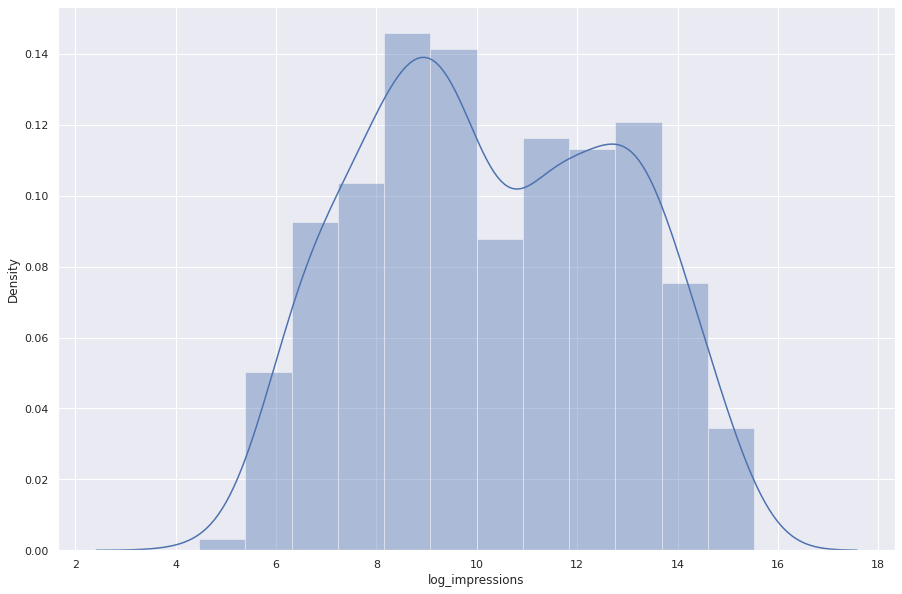

In [12]:
# Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) 
# для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения
plt.figure(figsize=(15, 10))
sns.set_theme()
sns.distplot(impr_per_comp.log_impressions)

In [13]:
# Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), 
# которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

df['ctr'] = df.clicks / df.impressions
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [14]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,0.000164
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,0.000115
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.000100
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.000160
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,0.000234
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,0.001059


In [15]:
# Создайте новую колонку, затем посмотрите на описательные статистики. 
# В качестве ответа укажите ad_id объявления с наибольшим CTR.

df.loc[df.ctr.idxmax()]

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
impressions                   944
clicks                          1
spent                        1.42
total_conversion                1
approved_conversion             0
ctr                    0.00105932
Name: 150, dtype: object

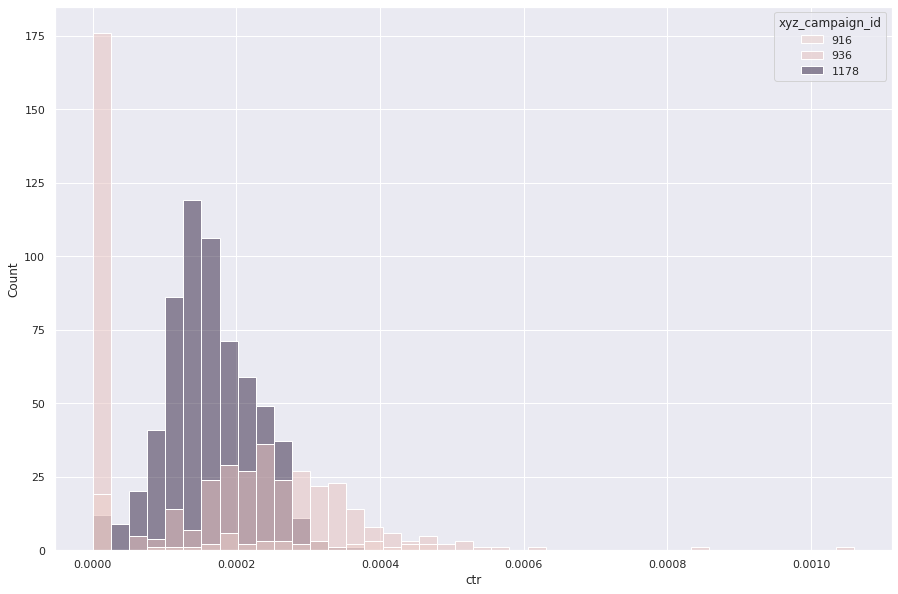

In [16]:
# Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 
# Какому графику соответствует распределение CTR кампании 916?

plt.figure(figsize=(15, 10))
sns.histplot(data=df, x="ctr", hue="xyz_campaign_id")

In [17]:
df['cpc'] = df.spent / df.clicks

In [18]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


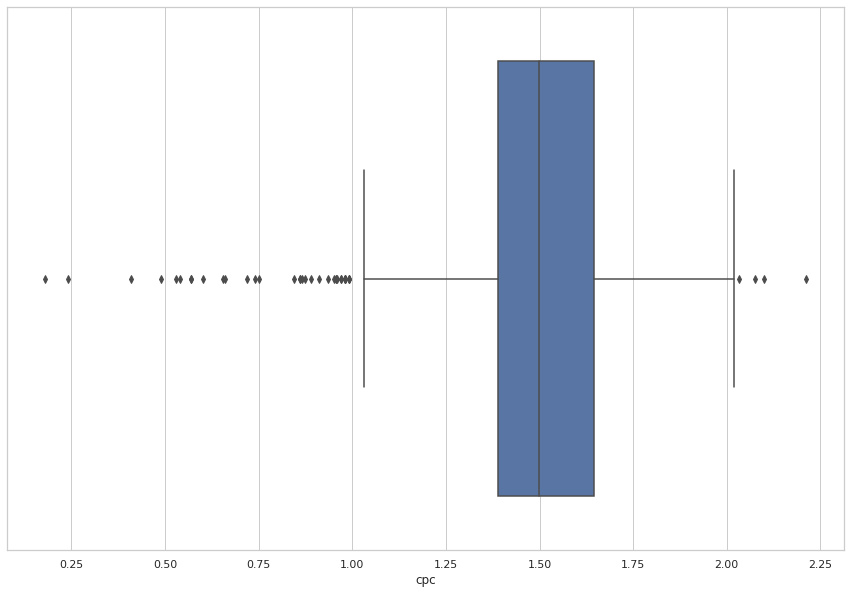

In [19]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")
sns.boxplot(x=df["cpc"].dropna())

In [20]:
# Выведите описательные статистики для новой переменной, посмотрите на форму распределения. 

df.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [21]:
abs(round(1.390000 - 1.644364, 2))

0.25

In [22]:
# В ответе укажите межквартильный размах, округленный до двух знаков после точки.

round(stats.iqr(df.cpc, nan_policy='omit'), 2)

0.25

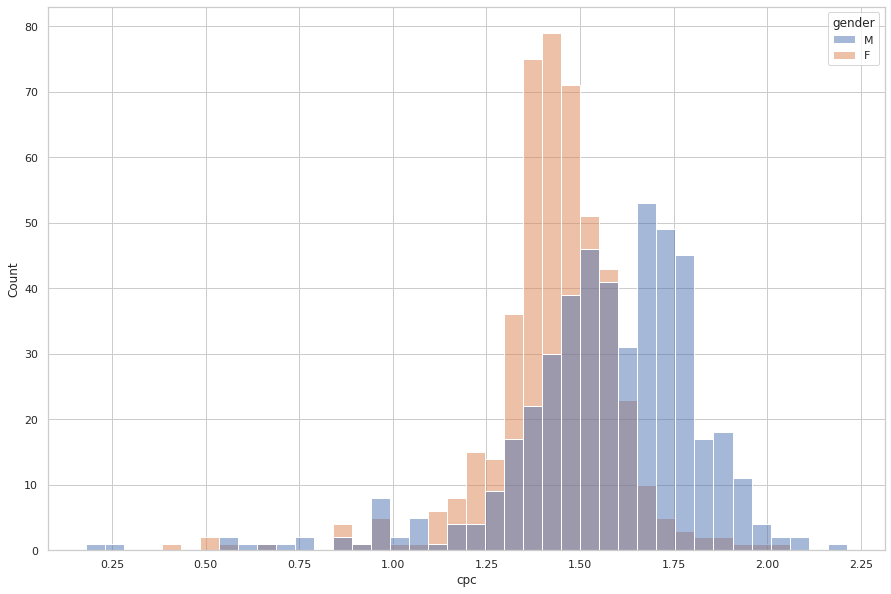

In [23]:
# Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

plt.figure(figsize=(15, 10))
sns.histplot(data=df.dropna(), x="cpc", hue="gender")

In [27]:
# Посчитайте конверсию из клика в покупку. 
# В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. 
# Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

df['cr'] = (df.approved_conversion / df.clicks).mul(100).round(2)

In [37]:
df.query('ad_id == 1121814').cr[860]

3.09